In [145]:
#imports

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

## Question 1

1. Show the distribution of phi and psi combinations using:

In [146]:
#Load data into Dataframe
df = pd.read_csv('./assignment3-data-1.csv')

In [147]:
#Removing redunt columns and NaN values
df_phi_psi = df.iloc[:, [3, 4]]
df_phi_psi = df_phi_psi.dropna()

a. A scatter plot

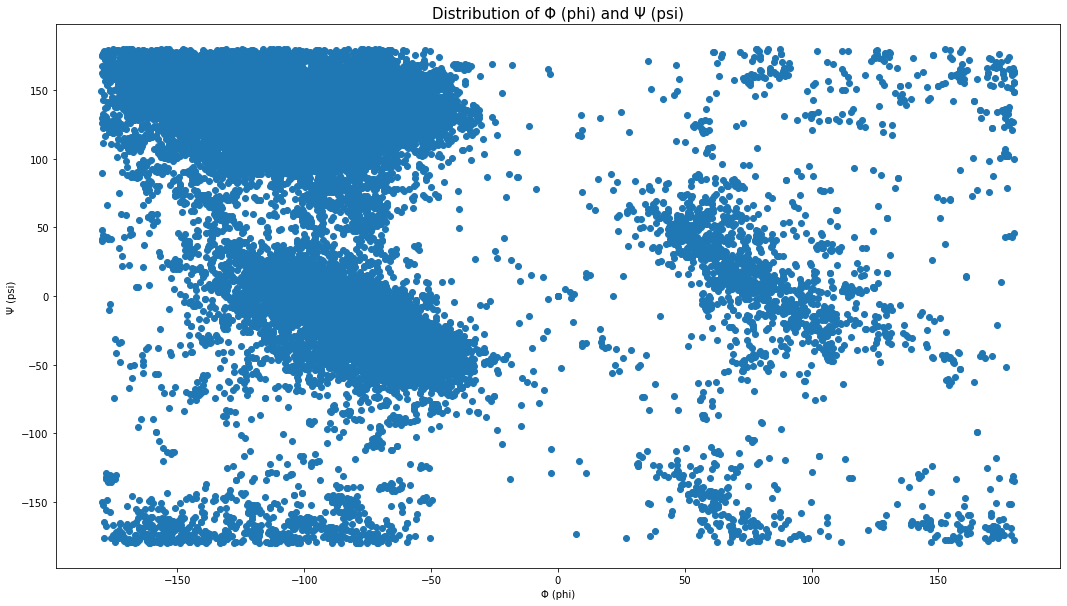

In [148]:
fig, ax = plt.subplots(figsize=(18, 10))

ax.set_title('Distribution of Φ (phi) and Ψ (psi)', size=15)
ax.set_xlabel('Φ (phi)', size=10)
ax.set_ylabel('Ψ (psi)', size=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

array = df_phi_psi.to_numpy()
x = array[:, 0]
y = array[:, 1]
ax.scatter(x, y)

b. A heatmap

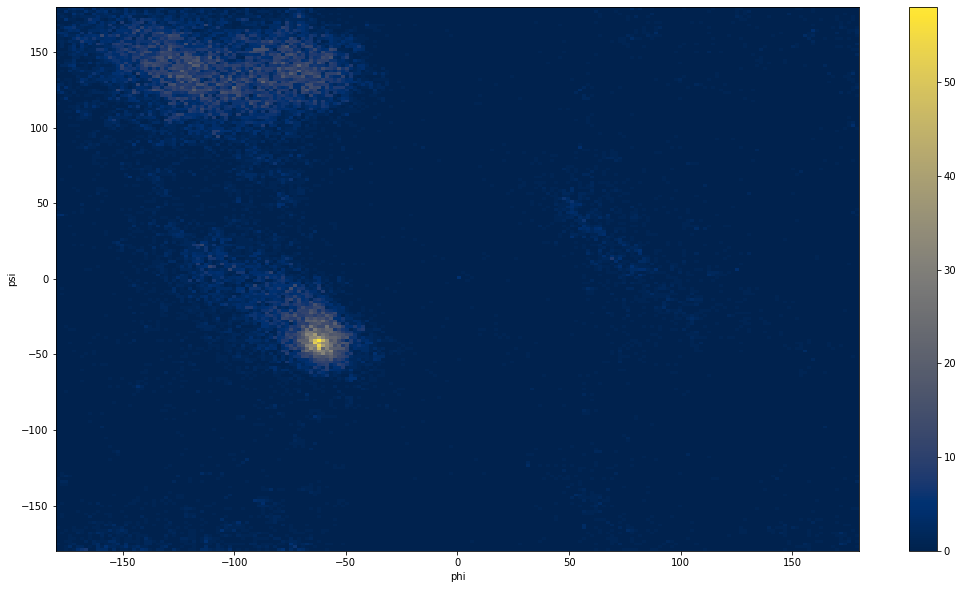

In [149]:
plt.subplots(figsize=(18, 10))
plt.hist2d(x, y, bins=(200, 200), linewidths=.5, cmap=plt.cm.cividis);
plt.ylabel('psi');
plt.xlabel('phi');
plt.colorbar();
plt.show()

2. Use the K-means clustering method to cluster the phi and psi angle combinations in the data file.

a. Experiment with different values of K. Suggest an appropriate value of K for this task and motivate this choice.

We started trying from k = 2 and tested all values uptil 10. We thought that 10 was a good upper bound for maintaining readability. We could by performing the elbow method plot and see where the biggest variation in distortion, (mean squared error of the points from their centers), was in relation to the number of clusters. We arrived at the conclusion that 3 clusters was a good amount to continue the assignment judging from the graph and our own intuition.

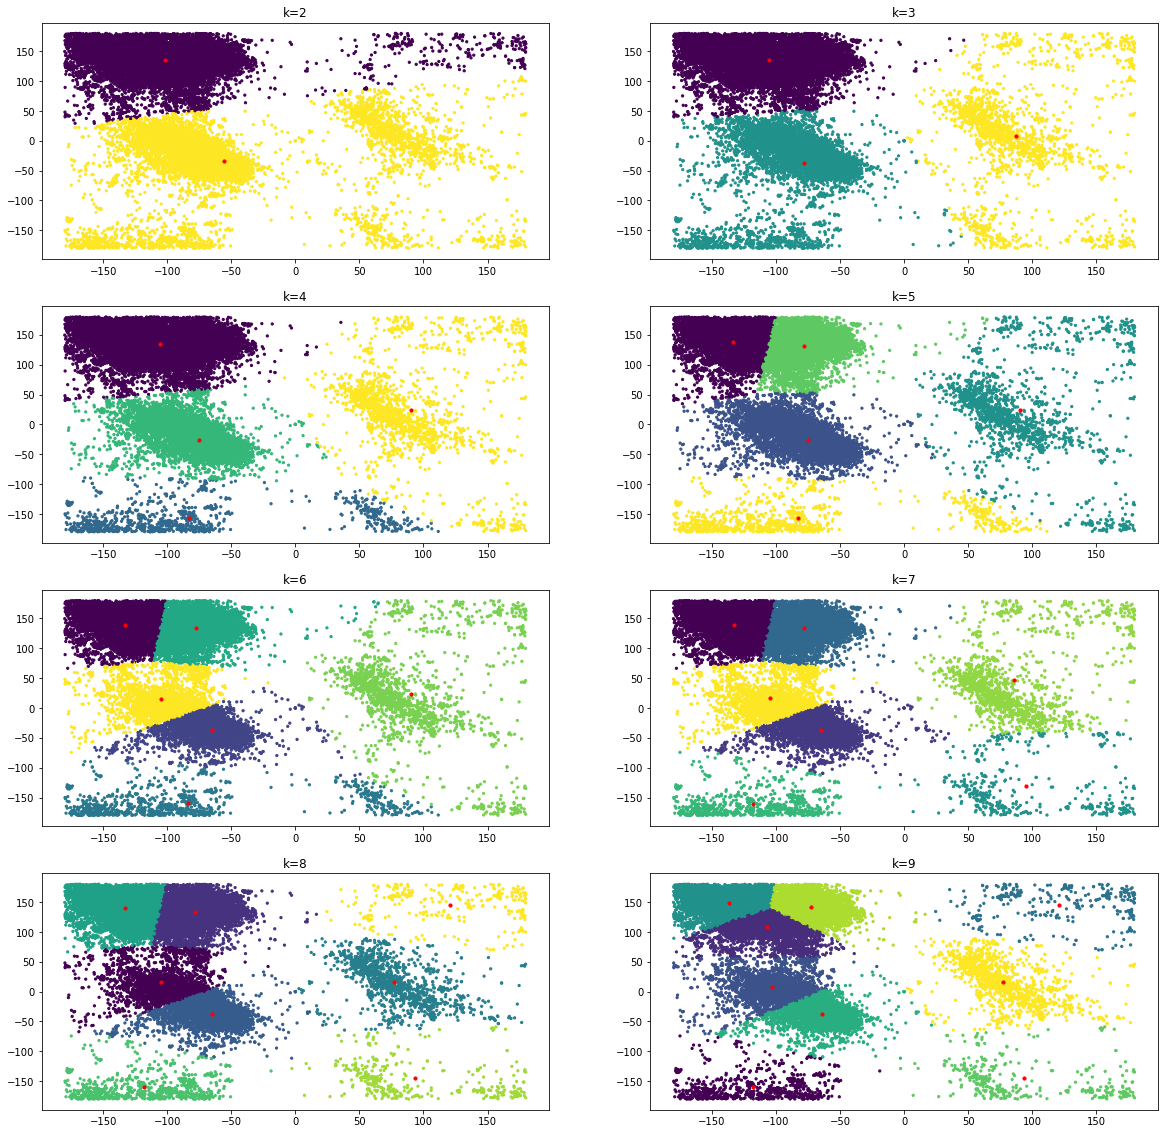

In [150]:
fig, axs = plt.subplots(4,PLOTS_PER_ROW, figsize=(20, 20))

K = range(2,10)
i,j=0,0
PLOTS_PER_ROW = 2

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_phi_psi)
    y_kmeans = kmeans.predict(df_phi_psi)
    axs[i][j].scatter(df_phi_psi['phi'], df_phi_psi['psi'], c=y_kmeans, s=5)
    axs[i][j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=10)
    axs[i][j].title.set_text("k="+str(k))
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

plt.show()

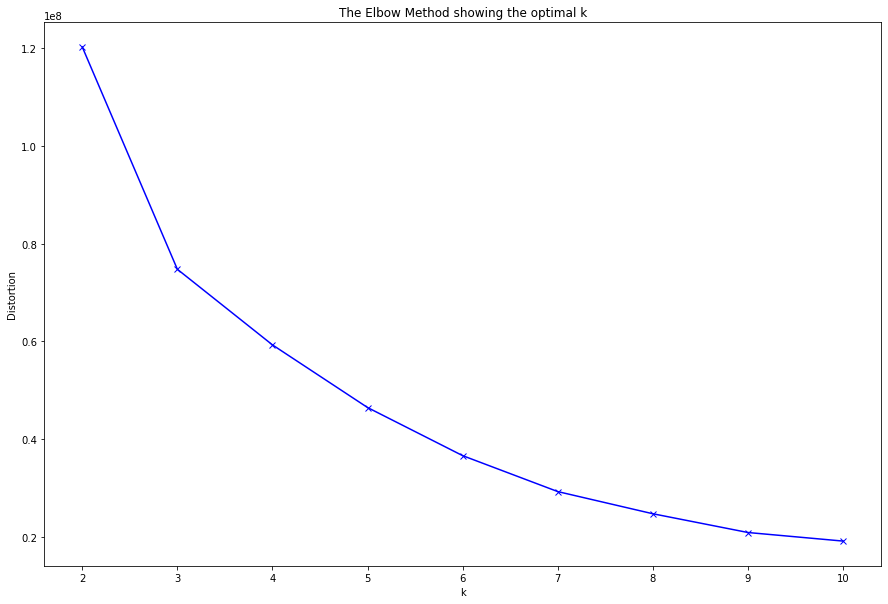

In [151]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_phi_psi)
    distortions.append(kmeanModel.inertia_)
     
plt.figure(figsize=(15,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

b. Validate the clusters that are found with the chosen value of K.

We can validate the clustering by checking the stability on the subsets, by removing some number of points at random, and using the silhouette coefficient method. To check the stability, we removed at random some number of points between 500 and 20000. We choose that interval since it amounts for roughly 20-70 percent of the total amount of points, hopefully with good distribution.

In [152]:
df_list = [None] * 4
amount_dropped_list = [None] * 4

for i in range (0,4):
    df_new = pd.DataFrame()
    remove_n = np.random.randint(500, 20000)
    drop_indices = np.random.choice(df_phi_psi.index, remove_n, replace=False)
    df_new = df_phi_psi.drop(drop_indices)
    df_list[i] = df_new
    amount_dropped_list[i] = remove_n

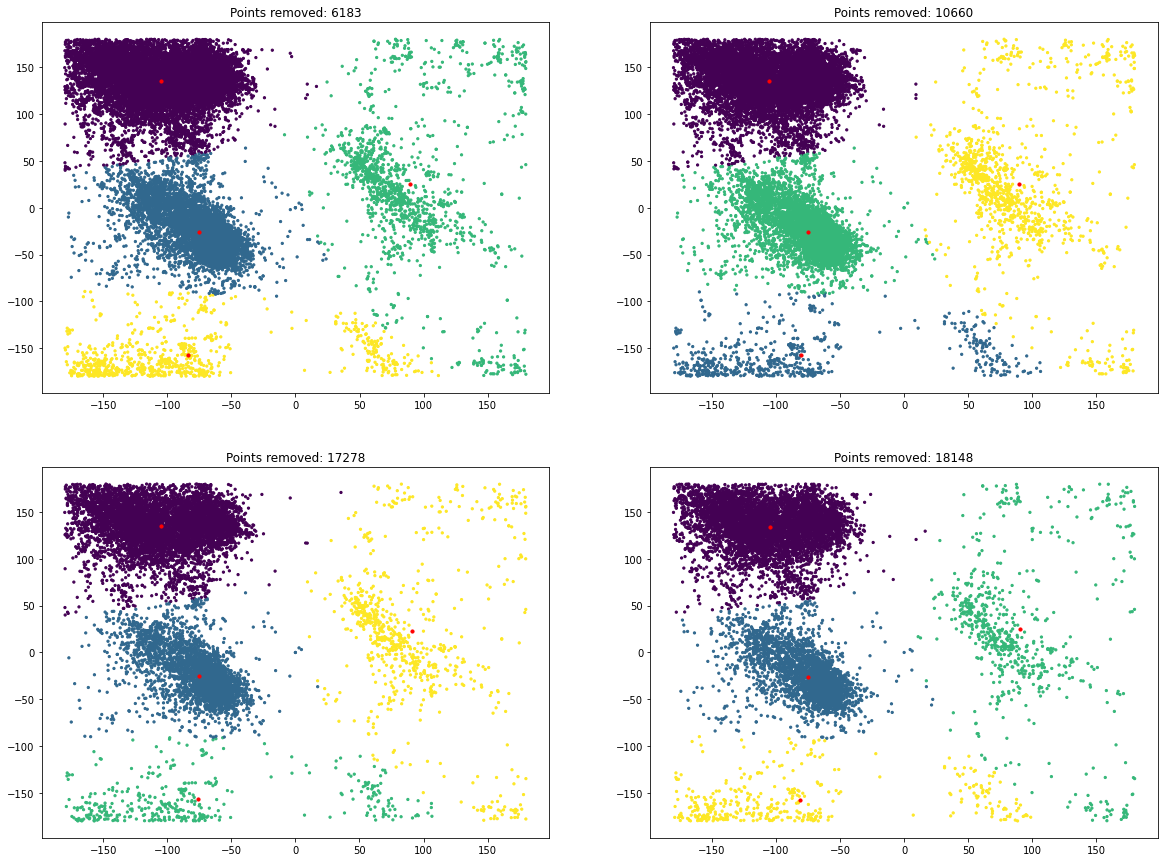

In [153]:
i,j=0,0
PLOTS_PER_ROW = 2
fig, axs = plt.subplots(2,PLOTS_PER_ROW, figsize=(20, 15))
for index in range(0,4):
    df_curr = df_list[index]
    kmeans = KMeans(n_clusters=4, random_state=0).fit(df_curr)
    y_kmeans = kmeans.predict(df_curr)
    axs[i][j].scatter(df_curr['phi'], df_curr['psi'], c=y_kmeans, s=5)
    axs[i][j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=10)
    axs[i][j].title.set_text("Points removed: "+str(amount_dropped_list[index]))
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0


plt.show()

The silhouette coefficient is a method for validating the consistency over clusters. The coefficient is some number, between -1 and 1, where 1 gives the strongest case for a good amount of clusters and vice versa. The value will tell us how much cohesion there is between a given object to its own cluster, with regards to euclidean distance. Again we choose to evaluate over clusters from 2 to 10 to give a clear indication of the peak coefficient value, our desired result. As we can see below there is again a strong case for 3 clusters.

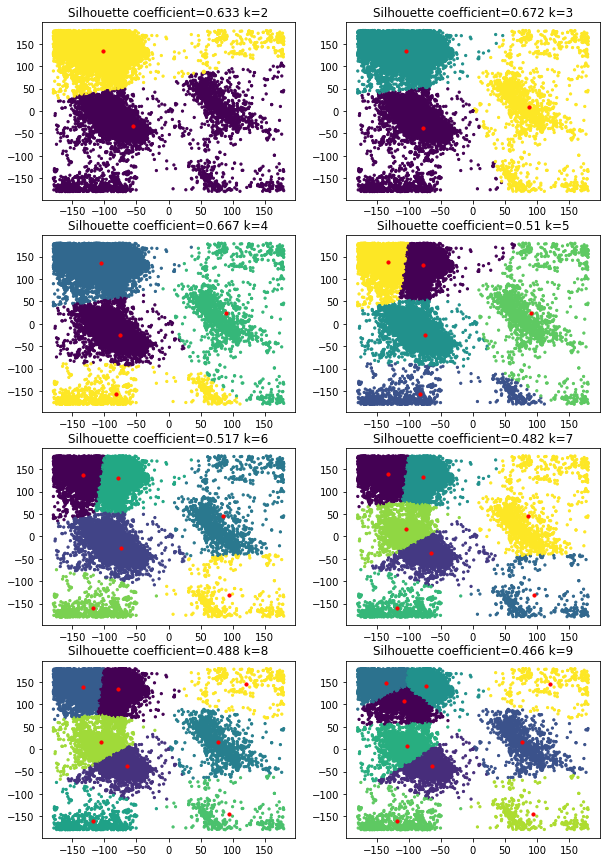

In [154]:
i,j=0,0
n_clusters = 2
PLOTS_PER_ROW = 2
fig, axs = plt.subplots(4,PLOTS_PER_ROW, figsize=(10, 15))
for index in range(8):
    kmeans = KMeans(n_clusters).fit(df_phi_psi)
    y_kmeans = kmeans.predict(df_phi_psi)
    silhouette_coefficient = silhouette_score(df_phi_psi, y_kmeans, metric='euclidean')
    axs[i][j].scatter(df_phi_psi['phi'], df_phi_psi['psi'], c=y_kmeans, s=5)
    axs[i][j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=10)
    axs[i][j].title.set_text("Silhouette coefficient="+str(round(silhouette_coefficient,3))+" k="+str(n_clusters))
    n_clusters+=1
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0

plt.show()

c. Do the clusters found in part (a) seem reasonable? 

We feel fairly confident, judging from the different validation methods, about the amount of clusters. However what’s less clear is the shapes of the clusters. Some clusters have points far away from its center and overall high variance. They don’t seem to belong to any cluster. The clusters might be improved with a different method than k-means.

d. Can you change the data to get better results (or the same results in a simpler 
way)?

Since the data points are periodic, they can be shifted to reappear on the opposite side of the graph. By reconfiguring the angles, we are in a way "pushing" the points to align better with the clusters. We arrived at the graph below by testing new modulated angles until we felt visually the representation was improved.

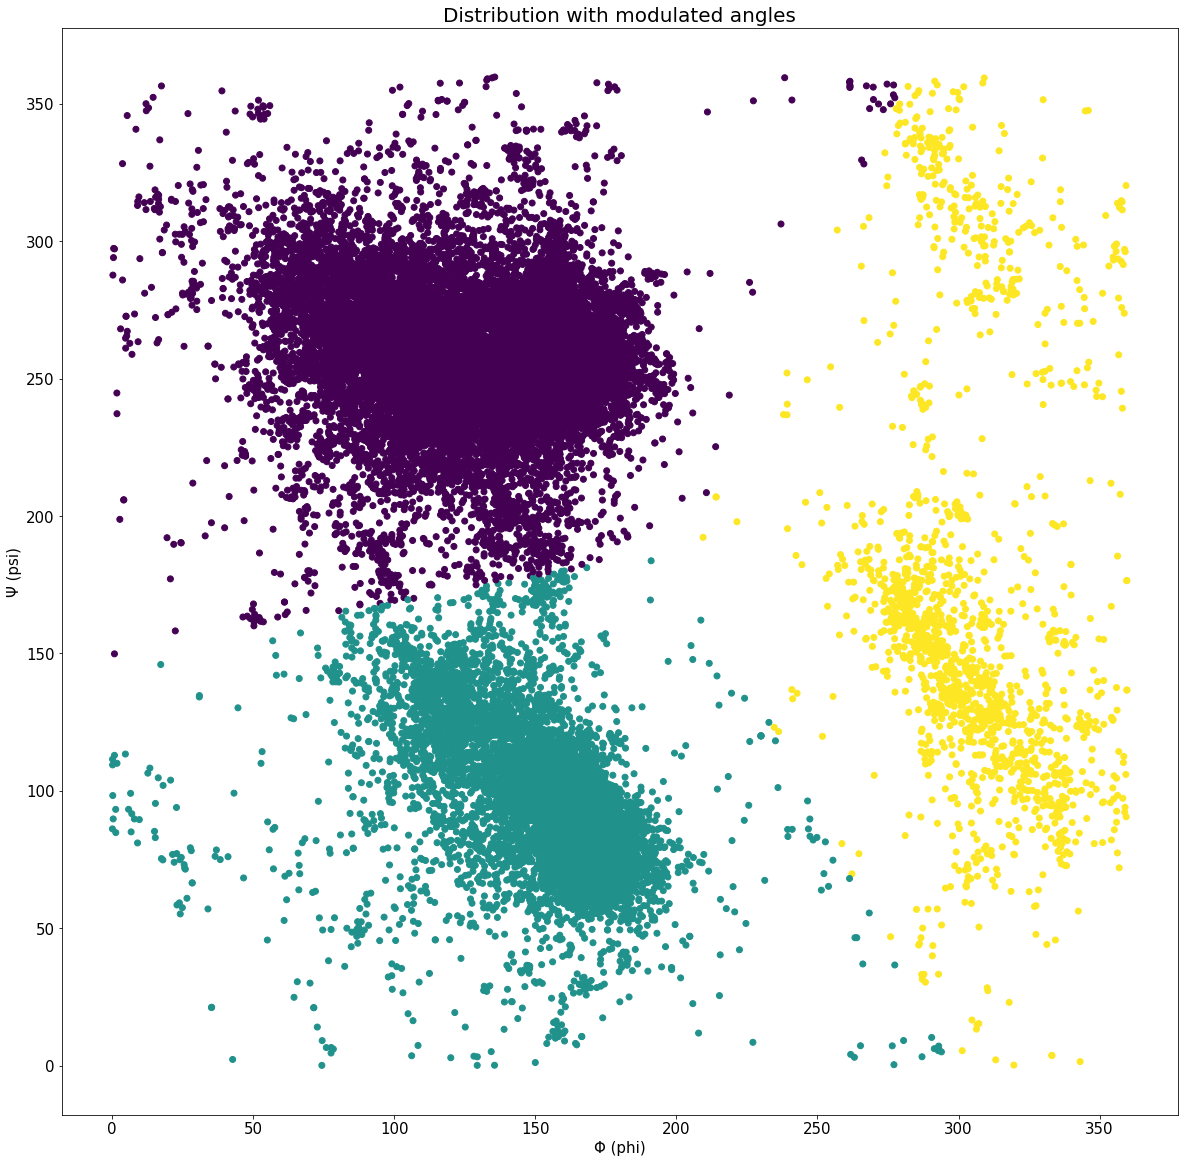

In [155]:
df_phi_psi_mod = pd.DataFrame(columns=['phi', 'psi'])

fig, ax = plt.subplots(figsize=(20, 20))

ax.set_title('Distribution with modulated angles', size=20)
ax.set_xlabel('Φ (phi)', size=15)
ax.set_ylabel('Ψ (psi)', size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)


df_phi_psi_mod['phi'] = list(map(lambda theta : (theta+230)%360, df_phi_psi['phi']))
df_phi_psi_mod['psi'] = list(map(lambda theta : (theta+120)%360, df_phi_psi['psi']))


kmeans = KMeans(n_clusters=3)
kmeans.fit(df_phi_psi_mod)
y_kmeans = kmeans.predict(df_phi_psi_mod)
ax.scatter(df_phi_psi_mod['phi'], df_phi_psi_mod['psi'], c = y_kmeans)

Use the DBSCAN method to cluster the phi and psi angle combinations in the data file. 
a. Motivate: 
i. the  choice  of the  minimum number  of  samples in the  neighbourhood  
for a point to be considered as a core point, and 
ii. the  choice  of  the  maximum distance between two  samples  belonging 
to the same neighbourhood (“eps” or “epsilon”). 

When using the DBSCAN algorithm we need to figure out the distance two points need to have to be considered neighbors (epsilon) and the smallest number of neighbors a point could have to be labeled as a core point (min_samples). By calculating the distance to the closest n points for any given point and plotting the results we can look to see where the change is at its most and select our epsilon. Also for the value of epsilon, we seek to choose a value that is large enough to capture enough border points that are "edge cases" but not too large that we start capturing noise/outliers.

From the graph below we can detect our steepest points when our epsilon is between 5 to 20. Our approach then is to start off to check values on our DBSCAN graph to see when we are visually satisfied. 12 seemed to be a good value for epsilon. We also arrived at a min_samples value of 150. This again from trying out combinations, but also comparing to other implementations of DBSCAN and checking the ratio between the number of data points within a cluster.

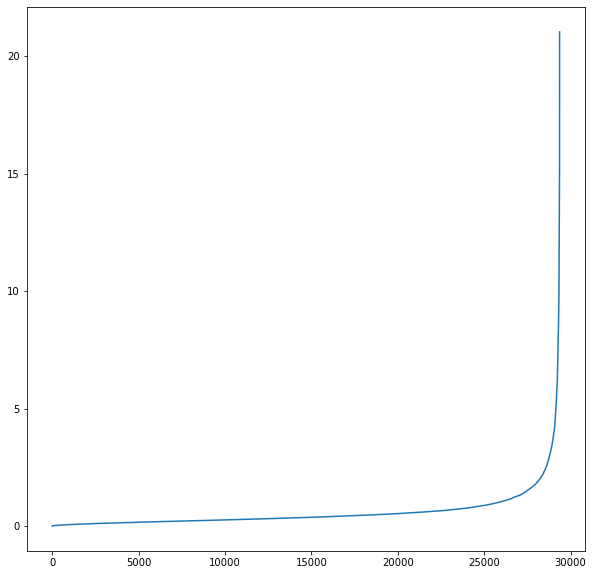

In [156]:
fig, ax = plt.subplots(figsize=(10, 10))

neighbors = NearestNeighbors(n_neighbors=2)
number_of_neighbors = neighbors.fit(df_phi_psi)
distances, indices = number_of_neighbors.kneighbors(df_phi_psi)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
ax.plot(distances)

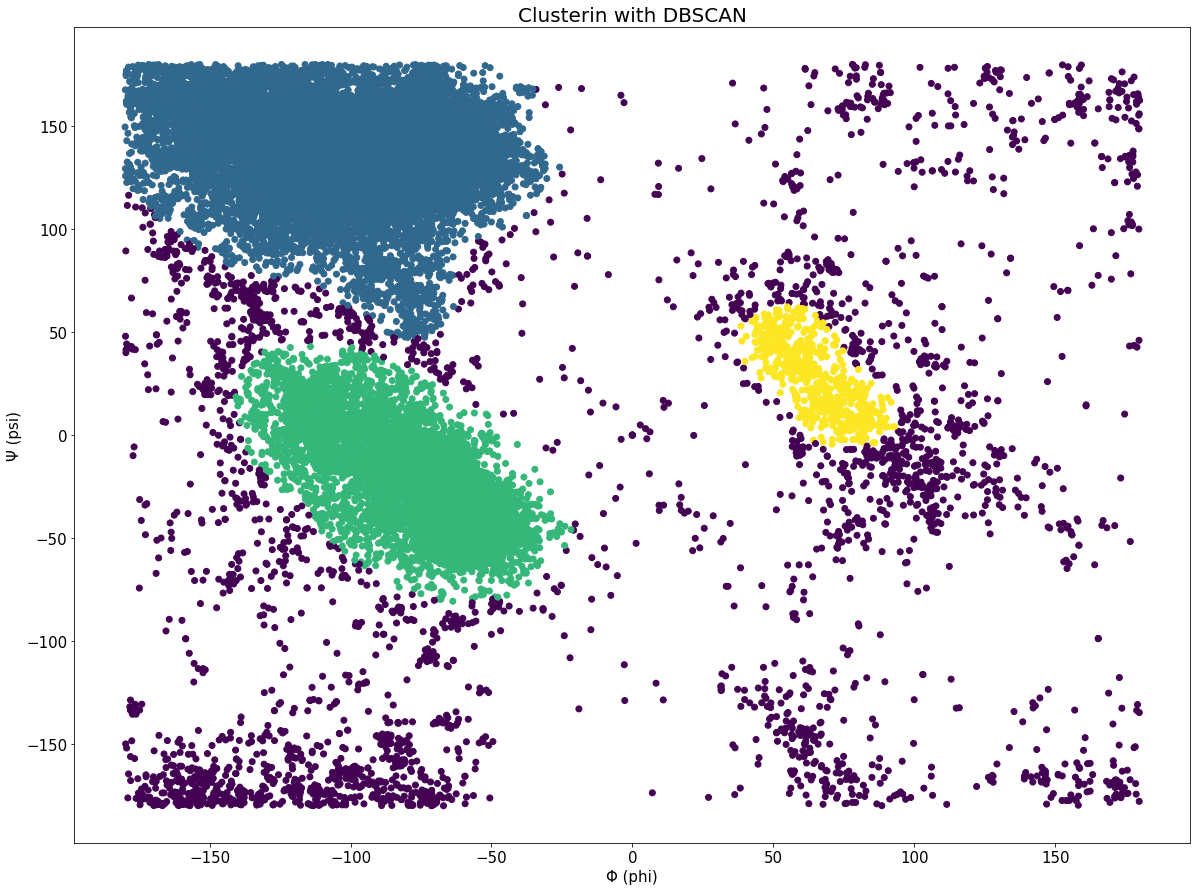

In [157]:
fig, ax = plt.subplots(figsize=(20, 15))

dbscan = DBSCAN(eps=12, metric='euclidean', min_samples=150).fit(df_phi_psi)
ax.scatter(df_phi_psi["phi"], df_phi_psi["psi"], c=dbscan.labels_)
ax.set_title('Clusterin with DBSCAN', size=20)
ax.set_xlabel('Φ (phi)', size=15)
ax.set_ylabel('Ψ (psi)', size=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

b. Highlight the clusters found using DBSCAN and any outliers in a scatter plot. How many outliers are found? Plot a bar chart to show which amino acid residue types are most frequently outliers. 

Estimated number of clusters: 4
Estimated number of outliers (noise points): 3052


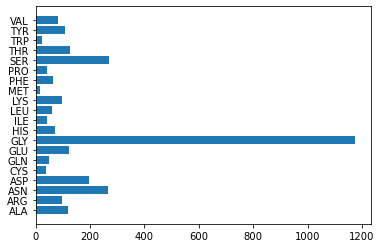

In [158]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_))
n_noise_ = list(dbscan.labels_).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of outliers (noise points): %d' % n_noise_)

(unique_points, noise_count) = np.unique(df[dbscan.labels_ == -1]['residue name'], return_counts=True)
plt.barh(unique_points, noise_count)
plt.show()

c. Compare the clusters found by DBSCAN with those found using K-means.

The clusters made from the DBSCAN algorithm enclose a lot of the outlying points with high variance, adding in our case a fourth cluster. DBSCAN does’t amend every single point to a cluster which could make it the prefered method allowing us to identify points that could be misplaced in a cluster.

d. Discuss whether the clusters found using DBSCAN are robust to small changes in the minimum number  of  samples  in  the  neighbourhood for a point to be considered as a core point, and/or the choice of the maximum distance between two samples belonging to the same neighbourhood (epsilon).

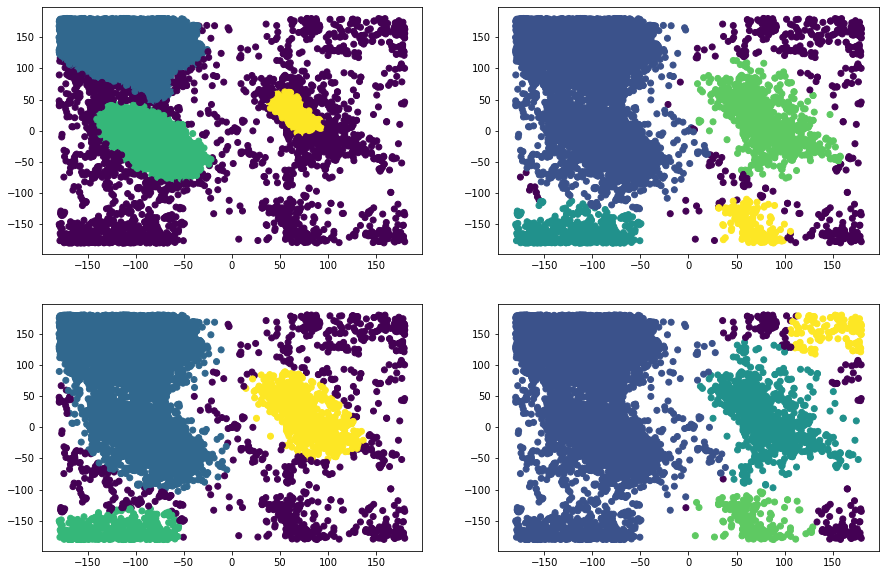

In [159]:
i,j=0,0
n_clusters = 2
PLOTS_PER_ROW = 2
fig, axs = plt.subplots(2,PLOTS_PER_ROW, figsize=(15, 10))
for index in range(4):
    dbscan = DBSCAN(eps=12+(10*index), metric='euclidean', min_samples=150+(1*i)).fit(df_phi_psi)
    axs[i][j].scatter(df_phi_psi["phi"], df_phi_psi["psi"], c=dbscan.labels_)
    i+=1
    if i%PLOTS_PER_ROW==0:
        j+=1
        i=0

The min_samples and epsilon are sensitive to changes. It would seem likely for it to struggle to identify clusters within data of varying density. This is perhaps the trade-off when working with clusters of non-linear relationships. Above are just some examples of what smaller changes bring about.

q4

Here we had to alter the values for epsilon and min_samples values to better cluster the data. The PRO amino acid clusters are similar to the α and β clusters, as seen from http://bioinformatics.org/molvis/phipsi/. This would make a stronger case that it is restricted to some angles.

In [160]:
df_pro = df[df['residue name'] == "PRO"]
df_pro = df_pro.reset_index()
df_gly = df[df['residue name'] == "GLY"]
df_gly = df_gly.reset_index()

df_pro_scaled = StandardScaler().fit_transform(df_pro.iloc[:, [-2, -1]])
df_gly_scaled = StandardScaler().fit_transform(df_gly.iloc[:, [-2, -1]])

In [161]:
# Compute DBSCAN for pro
db = DBSCAN(eps=0.2, metric='euclidean', min_samples=30).fit(df_pro_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 296


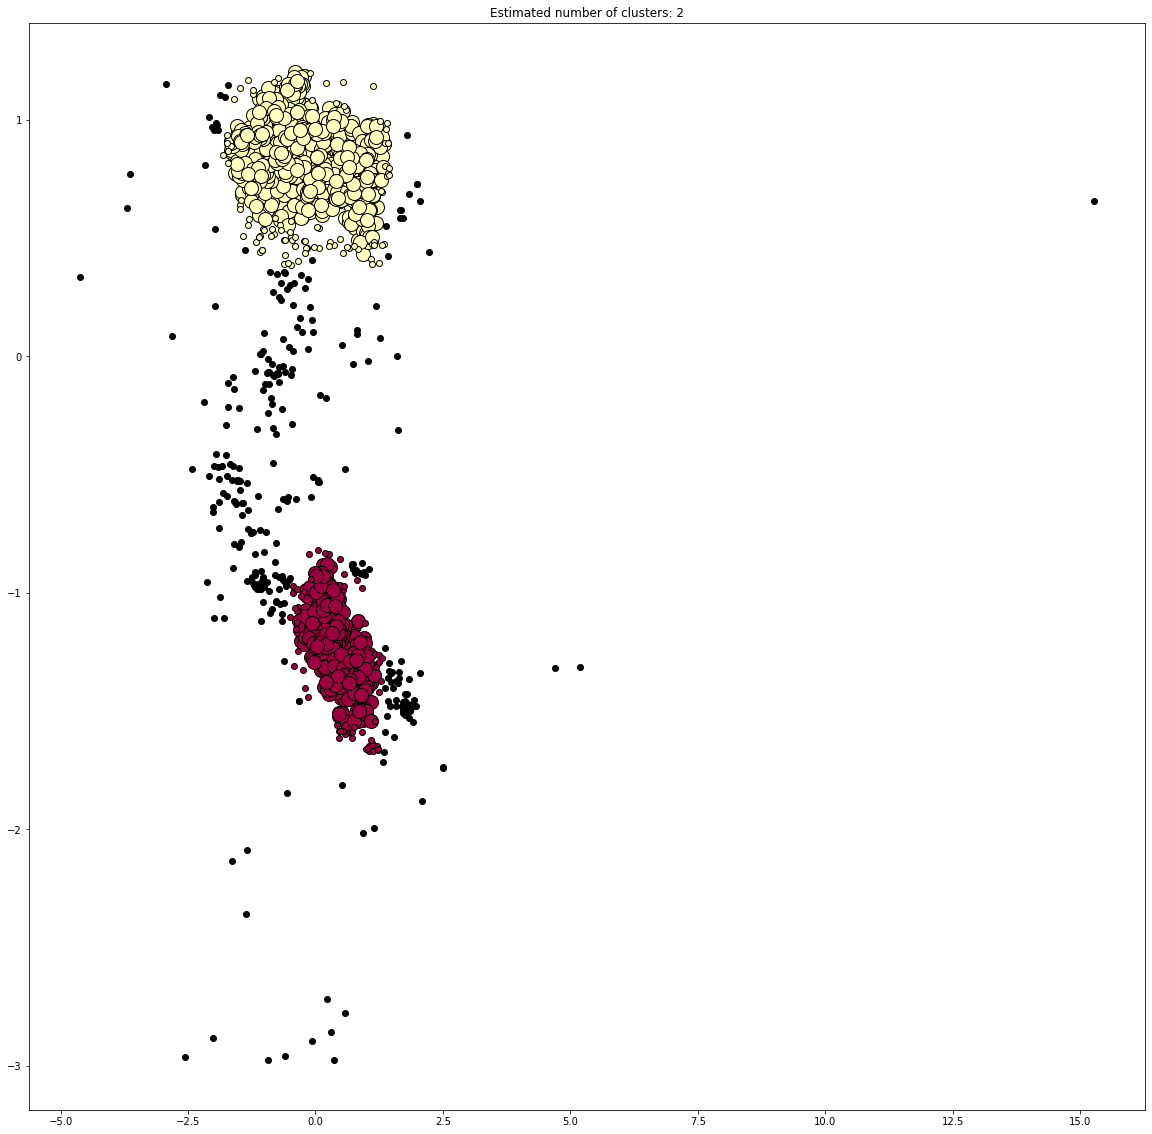

In [162]:
# Plot result for pro
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(20,20))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = df_pro_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_pro_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Again we keep the new values for epsilon and min_samples. The GLY amino acid makes up for bigger and more varied clusters. In researching this, we found that Glycine is least restricted to some set of angles as it only has a hydrogen atom for its side chain with a much smaller van der Waals radius. This explains the greater distribution of angles.

In [163]:
# Compute DBSCAN for gly
db = DBSCAN(eps=0.2, metric='euclidean', min_samples=30).fit(df_gly_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 102


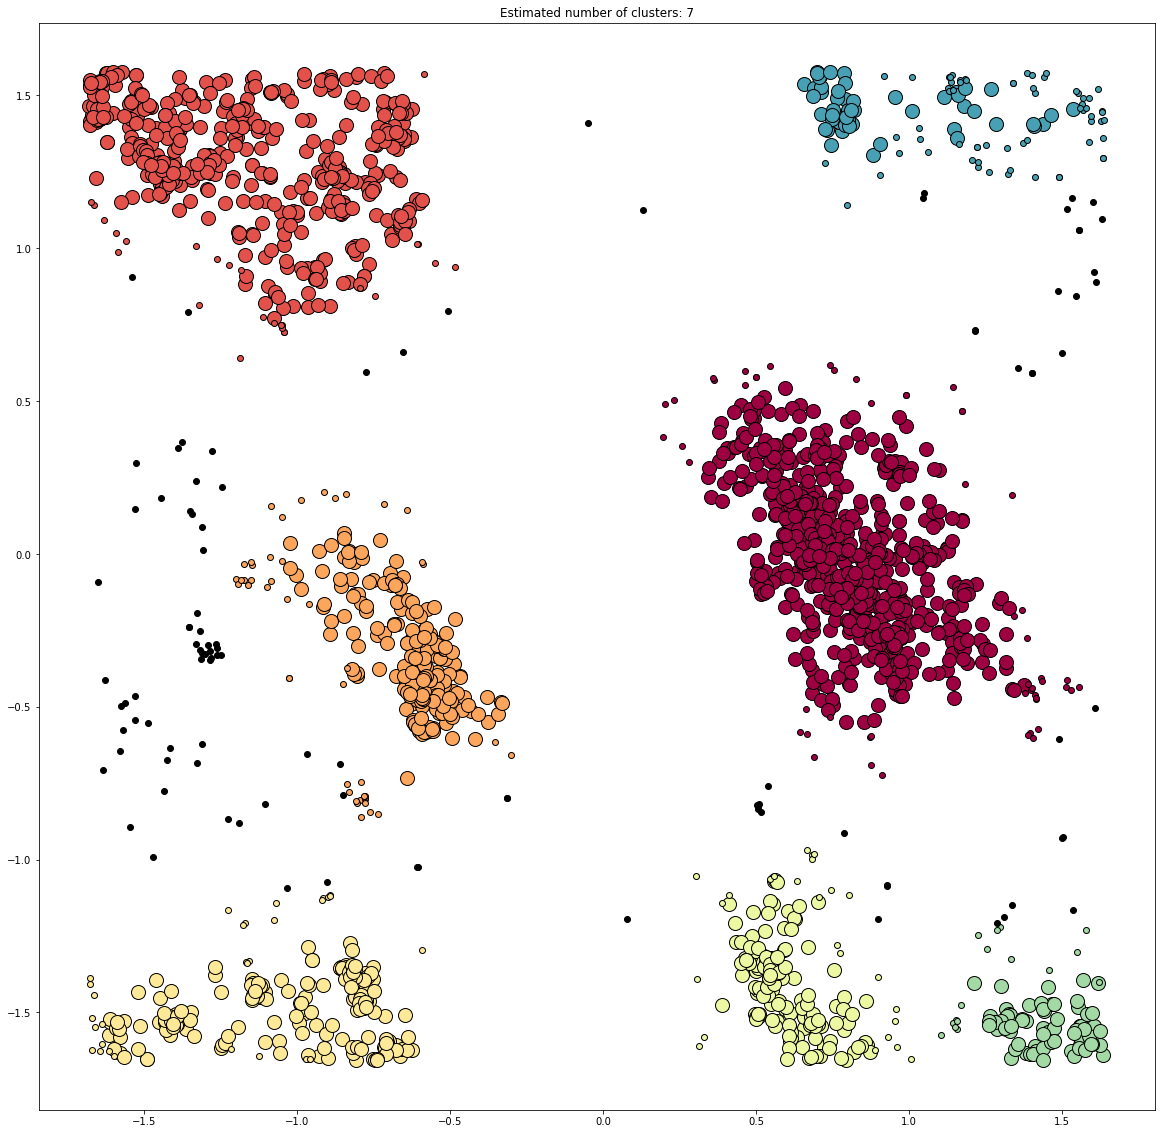

In [164]:
# Plot result for gly
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(20,20))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = df_gly_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = df_gly_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()